<a href="https://colab.research.google.com/github/vsemwal/human-walking-activities/blob/master/Reconstruction_Of_Occluded_Human_Gait_Trajectory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

In [ ]:
data = pd.read_csv("data1.csv")

In [ ]:
data.head()

,bodyIndex,tracked,trackingId,leftHandState,rightHandState,record_startime,record_timestamp,jointType,trackingState,depthX,depthY,colorX,colorY,cameraX,cameraY,orientationX,orientationY,orientationZ,orientationW
0,2,True,72057594037936129,0,0,1603439131546,22,0,2,0.082865,0.454402,0.180617,0.450025,-1.492820,0.071087,0.032486,0.822597,0.115591,0.555804
1,2,True,72057594037936129,0,0,1603439131546,22,1,2,0.089514,0.334515,0.184797,0.313279,-1.520798,0.433147,0.032965,0.820288,0.115455,0.559206
2,2,True,72057594037936129,0,0,1603439131546,22,2,2,0.096609,0.225167,0.188417,0.187036,-1.543856,0.785937,0.030671,0.820119,0.092852,0.563776
3,2,True,72057594037936129,0,0,1603439131546,22,3,2,0.115330,0.193992,0.203053,0.151478,-1.495548,0.895486,0.000000,0.000000,0.000000,0.000000
4,2,True,72057594037936129,0,0,1603439131546,22,4,2,0.067291,0.254345,0.165094,0.219604,-1.557473,0.655172,0.660445,-0.397907,0.454543,-0.445952


In [ ]:
data['record_timestamp'] = data['record_timestamp']/1000

In [ ]:
data['bodyIndex'].value_counts()

2    4650
5    2175
Name: bodyIndex, dtype: int64

In [ ]:
def sin(x, a, b, c, d):
    return a*np.sin(x*b + c) + d

def sin_cos(x, a, b, c, d, e, f, g):
    return a*np.sin(d*x + e) + b*np.cos(f*x + g) + c

In [ ]:
useful_joints = [12, 16, 13, 17, 14, 18]
jointNames = {12: "Left Hip", 
              13: "Left Knee", 
              14: "Left Ankle", 
              16: "Right Hip", 
              17: "Right Knee", 
              18: "Right Ankle"}

In [ ]:
def fun(data1, bi, jt, para, deg):
    print("\t\t Mean Absolute Error \t Mean Squared Error \t Mean Squared Log Error")
    leg = []
    
    x = data1[data1['bodyIndex'] == bi].loc[data1['jointType'] == jt]['record_timestamp']
    y = data1[data1['bodyIndex'] == bi].loc[data1['jointType'] == jt][para]
    
    x1 = data1[data1['bodyIndex'] == bi].loc[data1['jointType'] == jt].loc[data1['trackingState'] == 0]['record_timestamp']
    y1 = data1[data1['bodyIndex'] == bi].loc[data1['jointType'] == jt].loc[data1['trackingState'] == 0][para]
    
    x2 = data1[data1['bodyIndex'] == bi].loc[data1['jointType'] == jt].loc[data1['trackingState'] == 1]['record_timestamp']
    y2 = data1[data1['bodyIndex'] == bi].loc[data1['jointType'] == jt].loc[data1['trackingState'] == 1][para]

    x3 = data1[data1['bodyIndex'] == bi].loc[data1['jointType'] == jt].loc[data1['trackingState'] == 2]['record_timestamp']
    y3 = data1[data1['bodyIndex'] == bi].loc[data1['jointType'] == jt].loc[data1['trackingState'] == 2][para]
    
    plt.figure(figsize=(10, 6))
    # plt.plot(x, y, color = "blue")
    # leg.append("All")
    
    # if len(x1):
    #     plt.plot(x1, y1, 'o', color = "red")
    #     leg.append("Tracking state 0")
    
    # if len(x2):
    #     plt.plot(x2, y2, 'o', color = "yellow")
    #     leg.append("Tracking state 1")
    
    if len(x3):
        plt.plot(x3, y3, 'o', color = "black")
        leg.append("Tracking state 2")
        
    # f1 = interp1d(x3, y3, kind = 'cubic')
    # x4 = np.linspace(min(x3), max(x3), 10000)
    # x4 = x3;
    # y4 = f1(x4)
    # print("Interpolation \t", mean_absolute_error(y3, y4), "\t", mean_squared_error(y3, y4), "\t", mean_squared_log_error(y3, y4))
    # plt.plot(x4, y4, '*', color = "purple")
    # leg.append("Interpolated")
    
    f2 = np.polyfit(x3, y3, deg)
    x5 = np.linspace(min(x3), max(x3), 10000)
    x5 = x3
    y5 = np.polyval(f2, x5)
    
    print("Polynomial \t", round(mean_absolute_error(y3, y5), 10), "\t\t",
                          round(mean_squared_error(y3, y5), 10), "\t\t",
                          round(mean_squared_log_error(y3, y5), 10))
    
    plt.plot(x5, y5, 'o', color = "green")
    leg.append("Curve Fitting")
    
    popt, pcov = curve_fit(sin, x3, y3, maxfev = 5000)
    plt.plot(x, sin(x, *popt), 'o')
    leg.append("sin function")
    print("sin \t\t", round(mean_absolute_error(y3, sin(x3, *popt)), 10), "\t\t",
                      round(mean_squared_error(y3, sin(x3, *popt)), 10), "\t\t",
                      round(mean_squared_log_error(y3, sin(x3, *popt)), 10))

    popt, pcov = curve_fit(sin_cos, x3, y3, maxfev = 15000)
    plt.plot(x, sin_cos(x, *popt), '*')
    leg.append("sin_cos function")
    print("sin + cos \t", round(mean_absolute_error(y3, sin_cos(x3, *popt)), 10), "\t\t",
                          round(mean_squared_error(y3, sin_cos(x3, *popt)), 10), "\t\t",
                          round(mean_squared_log_error(y3, sin_cos(x3, *popt)), 10))
    
    plt.legend(leg)
    plt.title("Joint - " + jointNames[jt] + "    Body Index - " + str(bi))
    plt.xlabel("Time(s)")
    plt.ylabel(para)

		 Mean Absolute Error 	 Mean Squared Error 	 Mean Squared Log Error
Polynomial 	 0.0061812455 		 8.04386e-05 		 3.94237e-05
sin 		 0.0089747488 		 0.0001873505 		 9.43139e-05
sin + cos 	 0.0063098812 		 9.16953e-05 		 4.46238e-05


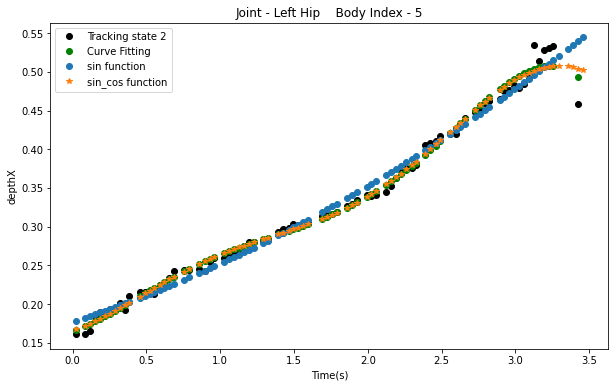

In [ ]:
fun(data.copy(), 5, 12, 'depthX', 5)

		 Mean Absolute Error 	 Mean Squared Error 	 Mean Squared Log Error
Polynomial 	 0.0147584845 		 0.0003037817 		 0.0001728517
sin 		 0.0184243818 		 0.0004894881 		 0.0002853118
sin + cos 	 0.0097766067 		 0.0001499266 		 8.60961e-05


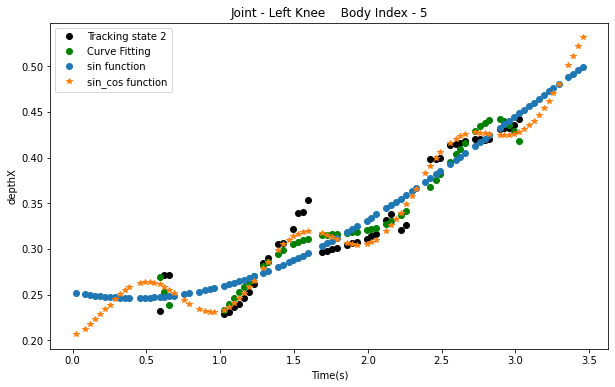

In [ ]:
fun(data.copy(), 5, 13, 'depthX', 5)

		 Mean Absolute Error 	 Mean Squared Error 	 Mean Squared Log Error
Polynomial 	 0.0115082361 		 0.0001853252 		 0.0001233698
sin 		 0.0154726366 		 0.0003812741 		 0.0002271565
sin + cos 	 0.0075262269 		 8.53912e-05 		 5.27696e-05


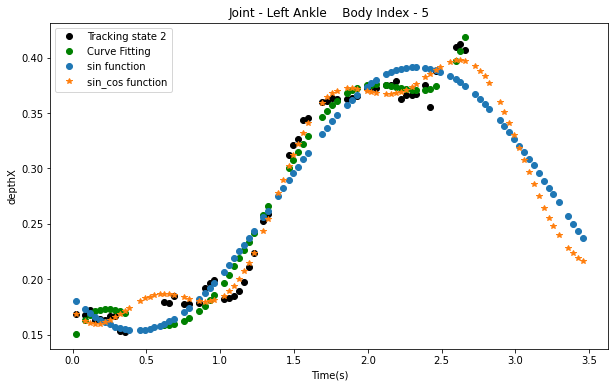

In [ ]:
fun(data.copy(), 5, 14, 'depthX', 5)

		 Mean Absolute Error 	 Mean Squared Error 	 Mean Squared Log Error
Polynomial 	 0.0056695632 		 5.38277e-05 		 3.13276e-05
sin 		 0.00736414 		 8.99361e-05 		 5.44239e-05
sin + cos 	 0.0055815939 		 5.26103e-05 		 3.00265e-05


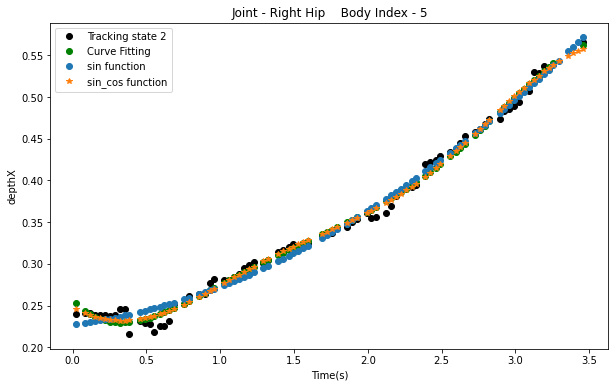

In [ ]:
fun(data.copy(), 5, 16, 'depthX', 5)

		 Mean Absolute Error 	 Mean Squared Error 	 Mean Squared Log Error
Polynomial 	 0.0117635572 		 0.0002148815 		 0.0001334751
sin 		 0.0167078368 		 0.0004110013 		 0.0002511802
sin + cos 	 0.0072216193 		 9.43409e-05 		 5.44938e-05


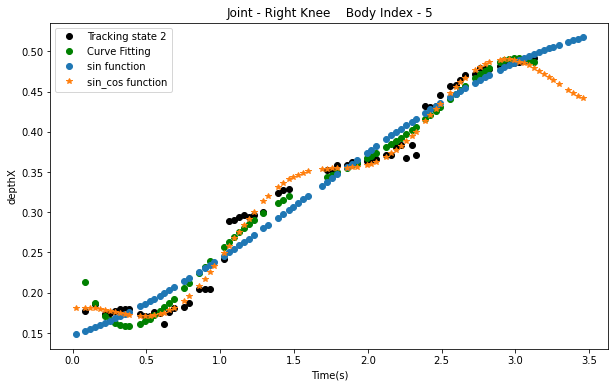

In [ ]:
fun(data.copy(), 5, 17, 'depthX', 5)

		 Mean Absolute Error 	 Mean Squared Error 	 Mean Squared Log Error
Polynomial 	 0.0082655328 		 0.0001187595 		 6.13392e-05
sin 		 0.0198016176 		 0.0006254849 		 0.0003240101
sin + cos 	 0.0079770924 		 0.0001117678 		 6.03653e-05


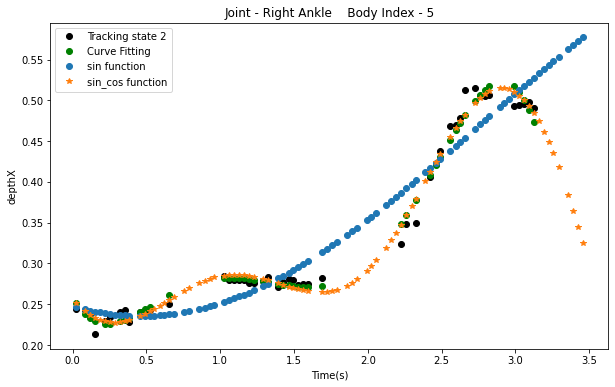

In [ ]:
fun(data.copy(), 5, 18, 'depthX', 5)